<a href="https://colab.research.google.com/github/SatNichapon/DSI205_project/blob/main/DSI205project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Least-Squares Problem Project 

## Data Description

Dataset Link: https://www.kaggle.com/datasets/yasserh/walmart-dataset

Code Credits: https://www.kaggle.com/code/arsalanrehman/sales-analytics-prediction  (Used for learning)

####**Description**:
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

####**Acknowledgements**
The dataset is taken from Kaggle.



####**Objective**:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t single & multiple features.
Also evaluate the models & compare their respective scores like R2, RMSE, etc.

#### **Walmart.csv**
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields: \
* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Prepare Dataset

<h3> Import Libraries </h3> 

In [106]:
import numpy as np
import pandas as pd
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

<h3> Load the Dataset </h3>

Install kaggle

In [103]:
#สร้าง directory ที่เรียกว่า kaggle พร้อมทั้งเขียน API (kaggle.json) ใน directory ใช้ !chmod 600 เพื่อขอ permissions เพื่ออ่านและเขียน kaggle.json install package เพื่อดึงdata จาก kaggle ผ่าน cmd
!mkdir ~/.kaggle
!echo '{"username":"satnic","key":"2dc47bf14b840441564d87209e1d9136"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download Walmart dataset from Kaggle

In [104]:
!kaggle datasets download yasserh/walmart-dataset

walmart-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Unpack zip file

In [105]:
!unzip walmart-dataset.zip

Archive:  walmart-dataset.zip
replace Walmart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Walmart.csv             


In [107]:
data = pd.read_csv('Walmart.csv')
df = pd.DataFrame(data)
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [108]:
df.shape #ดูขนาดของข้อมูล

(6435, 8)

### Data Cleaning

In [109]:
df.info() #ดู meta data ของ df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [110]:
df['Date'] = pd.to_datetime(df['Date']) #นำ column Date ใน Walmart dataset แปลงเป็น datetime format

In [111]:
df.info() #เช็คดู meta data อีกรอบ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [112]:
df.describe() #ดูค่าทางสถิติบางตัวของ dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Check duplicate

In [113]:
df[df.duplicated()] 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


Check missing values

In [114]:
df.isnull().mean()

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

<h3> Fixing Outliers </h3>


In [115]:
# สร้างฟังก์ชัน(find_outlier_rows) ที่รับค่า DataFrame และชื่อ column เพื่อระบุค่า outliner ใน column นั้น โดยใช้เกณฑ์ค่าที่อยู่นอกช่วง 1.5 ของ IQR และให้ return df ที่เก็บค่า outliner ไว้
def find_outlier_rows(df, col):
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

  lower_bound = df[col].quantile(0.25) - 1.5*iqr
  upper_bound = df[col].quantile(0.75) + 1.5*iqr
  
  return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [116]:
# สร้างฟังก์ชัน(count_outliers) ที่รับค่า DataFrame โดยฟังก์ชั่นจะเลือก numerical column และเรียกใช้ฟังก์ชัน find_outlier_rows กับ numerical column และ 
# column ที่มี outlier outlier จะถูกคำนวณเป็นเปอร์เซนต์ของทั้ง column นั้น และเก็บไว้ใน outliers_df ซึ่ง outliers_df ยังเก็บจำนวน outlier สุดท้ายจะ return ค่า outliers_df
def count_outliers(df):
  df_numeric = df.select_dtypes(['int', 'float'])
  cols_numeric = df_numeric.columns

  outlier_cols = [col for col in cols_numeric if len(find_outlier_rows(df_numeric, col)) != 0]

  outliers_df = pd.DataFrame(columns=['outlier_count', 'outlier_percent'])

  for col in outlier_cols:
    outlier_count = len(find_outlier_rows(df_numeric, col))
    all_entries = len(df[col])
    outlier_percent = (outlier_count/all_entries)*100

    outliers_df.loc[col] = [outlier_count, outlier_percent]

  return outliers_df

In [117]:
count_outliers(df).sort_values('outlier_count', ascending=False)

,outlier_count,outlier_percent
Unemployment,481.0,7.474747
Holiday_Flag,450.0,6.993007
Weekly_Sales,34.0,0.528361
Temperature,3.0,0.046620


The above dataframe shows that Unemployment, Holiday_Flag, Weekly_Sales and Temperature all have outliers. 

Let's examine further into each column to decide how to handle them.


In [118]:
find_outlier_rows(df, 'Unemployment')['Unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: Unemployment, dtype: float64

In [119]:
find_outlier_rows(df, 'Holiday_Flag')['Holiday_Flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Holiday_Flag, dtype: float64

In [120]:
find_outlier_rows(df, 'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143
526,4,2011-12-16,2771397.17,0,36.44,3.149,129.898065,5.143
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007
1329,10,2010-11-26,2939946.38,1,55.33,3.162,126.669267,9.003


<h3> Do a feature engineering</h3>

In [121]:
df['Employment'] = 100 - df['Unemployment']
df.sample(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment
2436,18,2010-12-03,1138800.32,0,42.39,2.805,131.784000,9.202,90.798
3361,24,2011-06-24,1304850.67,0,68.88,3.964,135.265267,8.212,91.788
233,2,2011-10-28,1769296.25,0,65.87,3.372,217.325182,7.441,92.559


In [122]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


<h3>Let's find if there's a correlations between the features and the target (Weekly_Sales) </h3>

Text(0.5, 1.0, 'Correlation Heatmap')

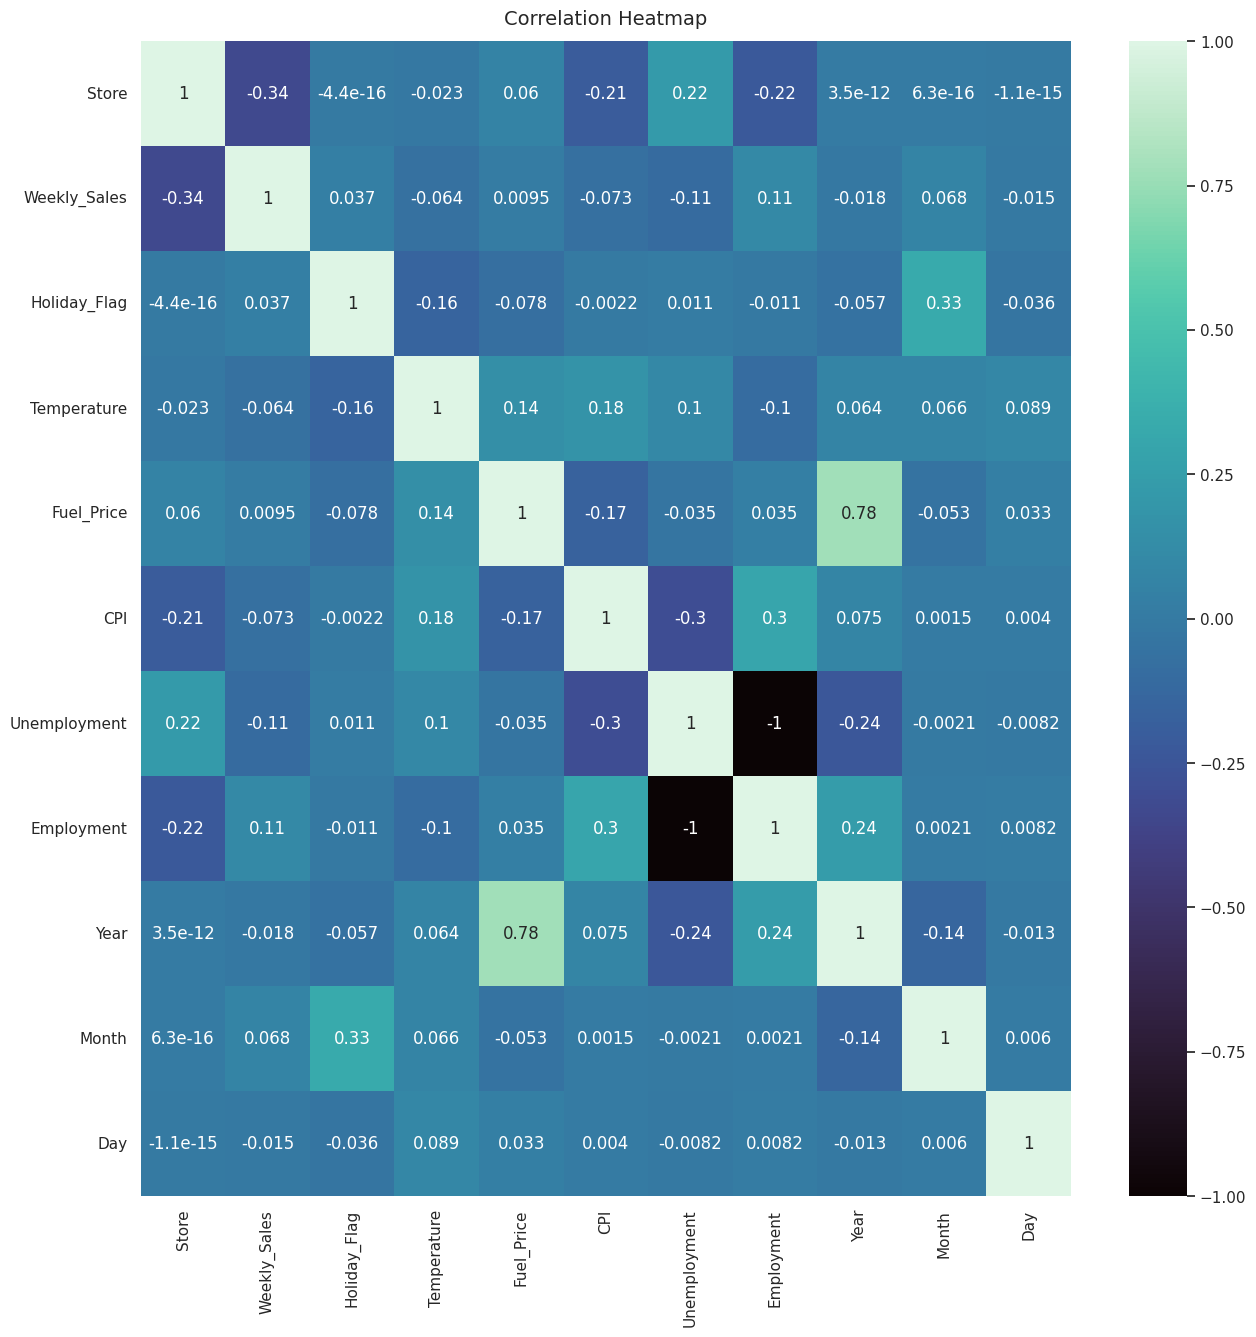

In [133]:
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1 ,annot=True, cmap="mako")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

Weekly_Sales has the strongest correlation with Employment (0.11 correlation coefficient).

## Model building

In [134]:
df_copy = df.copy()
df_copy.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


In [135]:
# นำ column Date และ Unemployment ออก เนื่องจากเรามี column Employment, Year, Month และ Day แทนแล้ว 
df_copy.drop(['Date', 'Unemployment'], axis=1, inplace=True)
df_copy.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Employment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,91.894,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,91.894,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,91.894,2010,2,19


Seperate X and y

In [136]:
# ให้ X แทน df ที่นำ Weekly_Sales ออก และ Y แทน serie ของ column Weekly_Sales
X = df_copy.drop('Weekly_Sales', axis=1)
y = df_copy['Weekly_Sales']

Scaling the features

In [137]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [138]:
# pd.DataFrame(X_scaled)

Split Train and Test data

In [139]:
# แบ่งข้อมูล train test อัตราส่วน 80 : 20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
print(f'Train data: {X_train.shape}')
print(f'Train target: {y_train.shape}')
print(f'Test data: {X_test.shape}')
print(f'Test target: {y_test.shape}')

Train data: (5148, 9)
Train target: (5148,)
Test data: (1287, 9)
Test target: (1287,)


<h3> Train Model </h3>

โดยลองใช้โมเดล Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, Decision Tree Regression และ Random Forest Regression มาเปรียบเทียบกัน

In [141]:
# สร้างฟังก์ชัน evaluate_model ที่รับค่า model, X_train, y_train, X_test, y_test โดยฟังก์ชันจะทำการ train โมเดล ทำนาย y_pred และ return ค่า RMSE และ R squared
def evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r_square = r2_score(y_test, y_pred)
  return rmse, r_square

In [142]:
# สร้างฟังก์ชัน evaluate_regressors_rmses_r2 ที่คำนวณหาค่า RMSE และ R2 จากฟังก์ชัน evaluate_model ของแต่ละ regressor เก็บไว้ในตัวแปร rmse_r2
# รวมถึงสร้าง DataFrame ที่มี column regressor_name, R2_Score และ RMSE ใช้เก็บชื่อของ regressor และค่า scoring ของแต่ละตัวที่ได้มาจากฟังก์ชัน evaluate_model ก่อนหน้านี้ และ return DataFrame นั้น
def evaluate_regressors_rmses_r2(regressors, regressor_names, X_train, y_train, X_test, y_test):
  rmse_r2 = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]

  rmses = list(zip(*rmse_r2))[0]
  r_squares = list(zip(*rmse_r2))[1]

  regressor_comp = dict(zip(regressor_names, zip(r_squares, rmses)))
  df = pd.DataFrame.from_dict(regressor_comp, orient='index')
  df = df.reset_index()
  df.columns = ['regressor_name', 'R2_Score', 'RMSE']

  return df.sort_values(by='R2_Score',ascending=False , ignore_index=True)

In [143]:
# ระบุโมเดลที่จะใช้ทดลองกับข้อมูล  
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()

In [144]:
#รวมโมเดลที่จะใช้ทดลองเก็บไว้ในลิส regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor,
              lasso_regressor, decision_tree_regressor, random_forest_regressor]

#รวมชื่อโมเดลที่จะใช้ทดลองเก็บไว้ในลิส regressor_names
regressor_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression',
                   'Lasso Regression', 'Decision Tree Regression', 'Random Forest Regression']

In [145]:
# เรียกใช้ฟังก์ชัน evaluate_regressors_rmses_r2
print('\033[1m Table of regressors with their RMSEs and R2 Score')
evaluate_regressors_rmses_r2(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors with their RMSEs and R2 Score


,regressor_name,R2_Score,RMSE
0,Random Forest Regression,0.951793,124619.892918
1,Decision Tree Regression,0.932222,147766.665739
2,Polynomial Regression,0.304281,473422.633518
3,Linear Regression,0.152828,522417.695958
4,Lasso Regression,0.152827,522418.001490
5,Ridge Regression,0.152818,522420.773473


#### Try 10-fold Cross-Validation

In [146]:
# สร้างฟังก์ชัน compare_cross_val ที่รับค่า regressors, X_train, y_train โดยฟังก์ชันจะทำการ train โมเดล ทำนาย y_pred และ return ค่า RMSE และ R squared
def compare_cross_val(regressors, X_train, y_train, cv=10, scoring='r2'):

  if scoring[:3] != 'neg':
    scores = [cross_val_score(regressor, X_train, y_train, cv=cv, scoring=scoring) for regressor in regressors]
  else: scores = [-cross_val_score(regressor, X_train, y_train, cv=cv, scoring=scoring) for regressor in regressors]

  regressor_k_score = dict(zip(regressor_names, scores))
  cross_df = pd.DataFrame.from_dict(regressor_k_score, orient='index')
  cross_df = cross_df.reset_index()
  
  indices = [int(fold)+1 for fold in list(cross_df.columns)[1:]]
  cross_df.columns = ['regressor'] + [f'fold {ind}' for ind in indices]
                                          
  return cross_df

In [147]:
compare_cross_val(regressors, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

,regressor,fold 1,fold 2,fold 3,fold 4,fold 5,fold 6,fold 7,fold 8,fold 9,fold 10
0,Linear Regression,517423.876021,507150.935581,517050.682204,507453.349047,564449.163117,507969.402563,511700.348826,527604.051961,537158.290964,518653.257267
1,Polynomial Regression,466750.609539,473055.439766,472918.343023,473260.033278,514342.789941,477306.725615,477518.110394,501630.632682,494648.894753,477773.144245
2,Ridge Regression,517423.074759,507151.139817,517048.400130,507452.289323,564445.311039,507968.359078,511701.676082,527602.486244,537158.498240,518652.423419
3,Lasso Regression,517423.761670,507151.264089,517050.419431,507453.188142,564449.283326,507969.249522,511700.467438,527603.902551,537158.653517,518653.140760
4,Decision Tree Regression,159924.101428,150732.188881,176297.185780,161164.698587,162730.103360,133674.245946,159749.665720,158961.317561,157668.300154,145532.145931
5,Random Forest Regression,129072.644213,119922.094891,125273.240788,115556.744706,136776.091521,105223.909428,116582.242562,128841.457071,108027.223956,123153.951200


In [148]:
def reshape_cross_df(regressors, X_train, y_train, cv=10, scoring='r2'):
  cross_df = compare_cross_val(regressors, X_train, y_train, cv=cv, scoring=scoring)
  reshape_df = pd.melt(cross_df, id_vars='regressor', var_name='fold', value_name='score')
  return reshape_df

In [170]:
def plot_compare_cross(df, score_name):
  plt.figure(figsize=(24,5))
  ax = sns.barplot(x='regressor', y='score', hue='fold', data=df)

  ax.set(xlabel=None)
  plt.ylabel(score_name)
  plt.title(f'A comparison of folds between each selected regressor on {score_name}')

  plt.show()

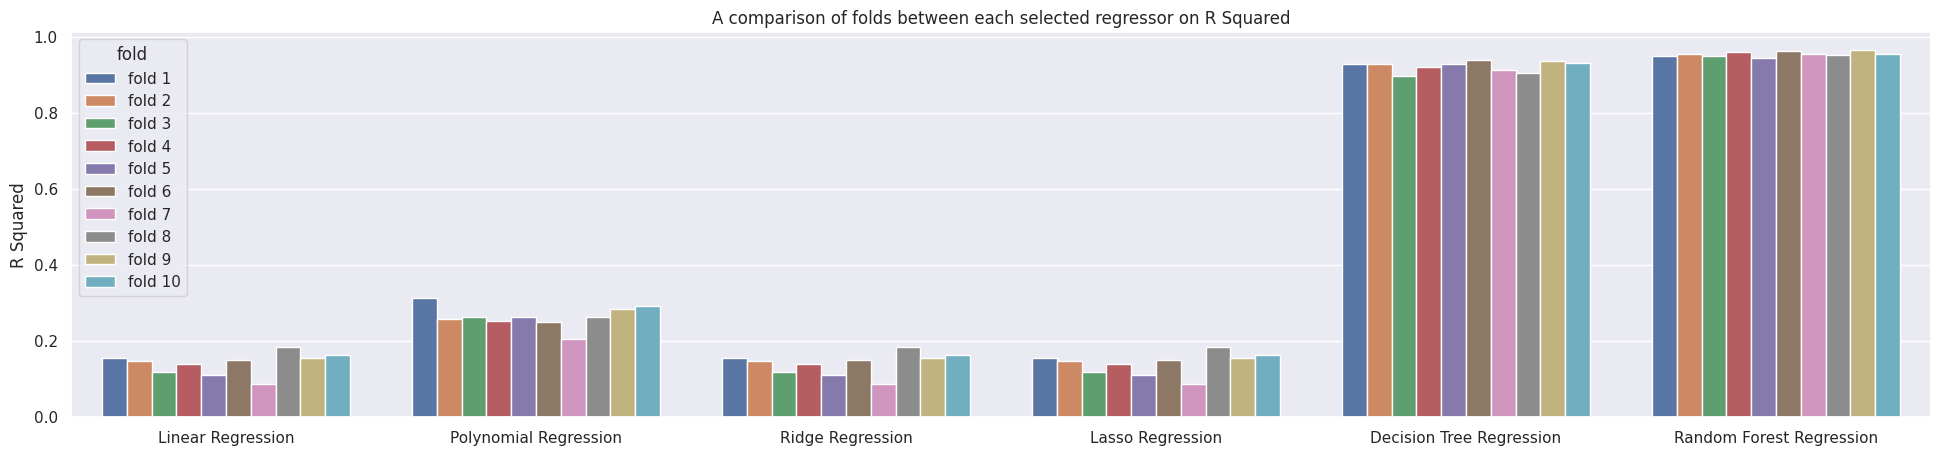

In [171]:
plot_compare_cross(reshape_cross_df(regressors, X_train, y_train, cv=10, scoring='r2'), score_name='R Squared')

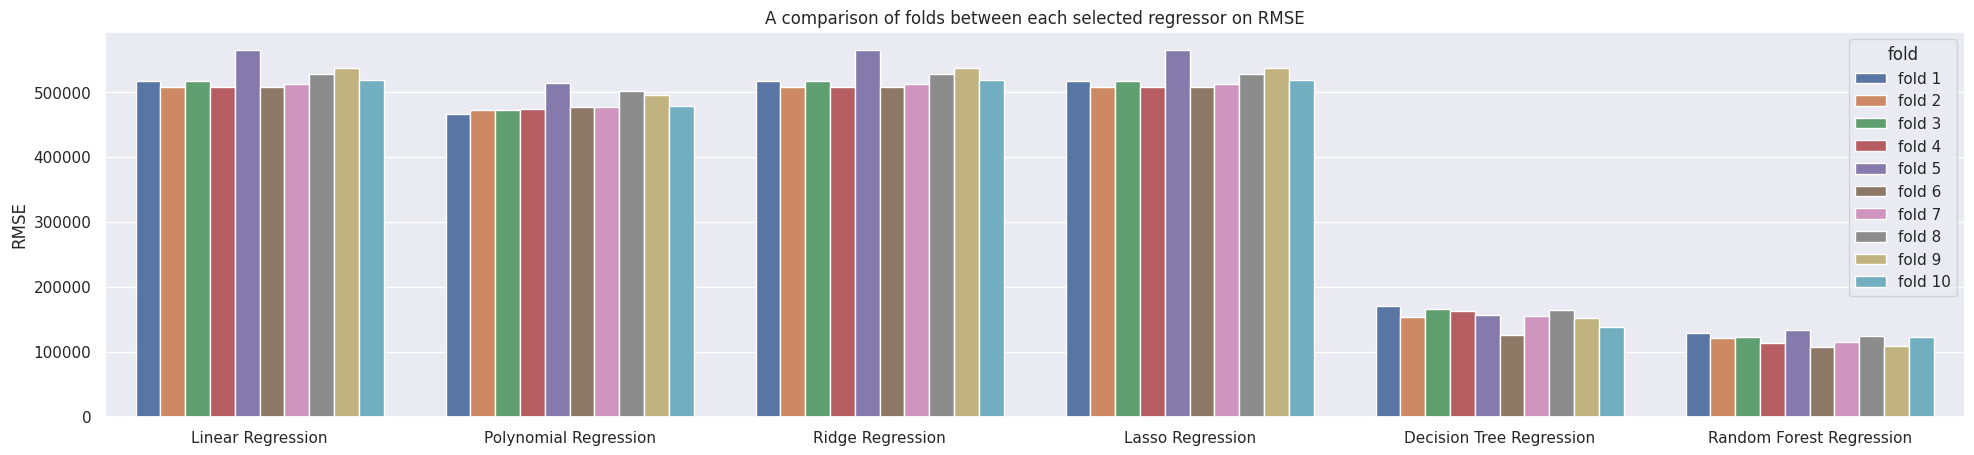

In [151]:
plot_compare_cross(reshape_cross_df(regressors, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'), score_name='RMSE')

## Result

In [152]:
cross_result_r2 = reshape_cross_df(regressors, X_train, y_train, cv=10, scoring='r2')
cross_result_rmse = reshape_cross_df(regressors, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
cross_result_r2.rename(columns={'score':'r2'}, inplace=True)
cross_result_rmse.rename(columns={'score':'rmse'}, inplace=True)

In [153]:
cross_result_df = cross_result_r2.loc[cross_result_r2['regressor'] == 'Random Forest Regression'].merge(cross_result_rmse, how='left')
cross_result_df

,regressor,fold,r2,rmse
0,Random Forest Regression,fold 1,0.945786,128239.989946
1,Random Forest Regression,fold 2,0.952261,121893.152448
2,Random Forest Regression,fold 3,0.948938,125138.577717
3,Random Forest Regression,fold 4,0.956170,113376.697579
4,Random Forest Regression,fold 5,0.948828,136756.371151
5,Random Forest Regression,fold 6,0.962463,109141.951960
6,Random Forest Regression,fold 7,0.952878,118148.035930
7,Random Forest Regression,fold 8,0.952544,124842.393510
8,Random Forest Regression,fold 9,0.966460,111494.308762
9,Random Forest Regression,fold 10,0.953847,122303.359816


In [154]:
cross_result_df.mean()

r2           0.954017
rmse    121133.483882
dtype: float64

The best fitting model from doing cross-validation 10 folds is Random Forest Regressor with a RMSEs of 120553.34 and R2 of 0.95

### Interpret Model and Report Results

In [155]:
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [156]:
random_forest_regressor.predict(np.array(X_test)[0].reshape((1,-1)))

array([1278754.0467])

In [157]:
np.array(y_test)[0]

1138800.32

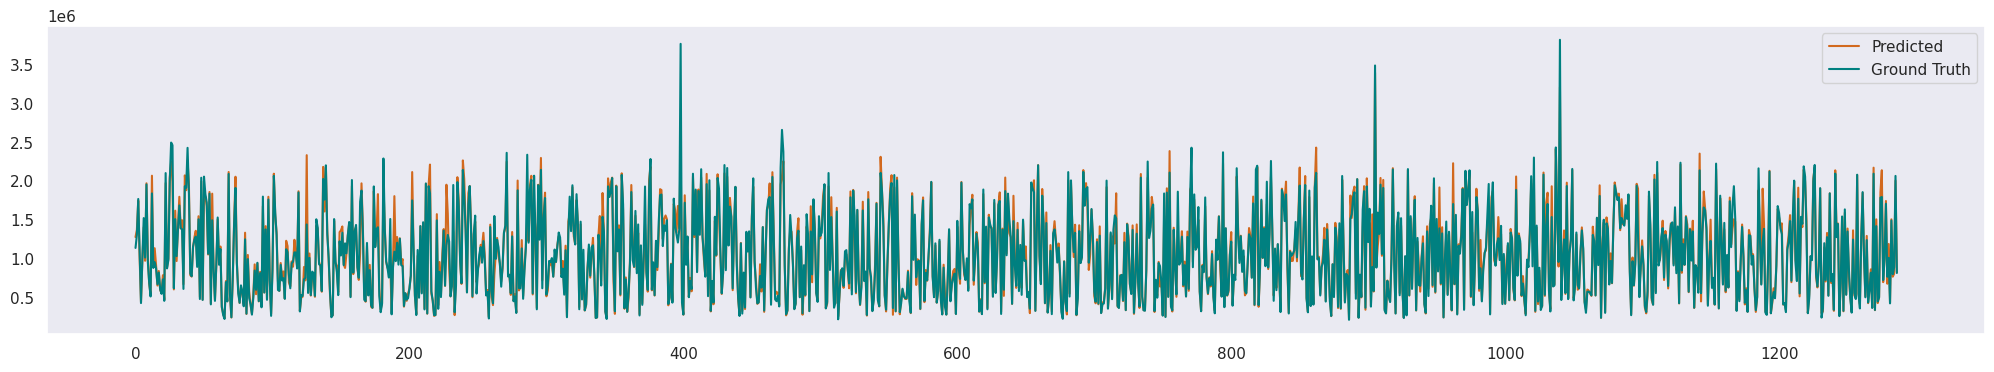

In [163]:
y_pred = random_forest_regressor.predict(X_test)
range = np.arange(0, len(y_test))

fig, ax = plt.subplots(figsize=(25, 4))
ax.grid(False)

ax.plot(range, y_pred, c='chocolate')
ax.plot(range, y_test, c='teal')

plt.legend(['Predicted', 'Ground Truth'])
plt.show()

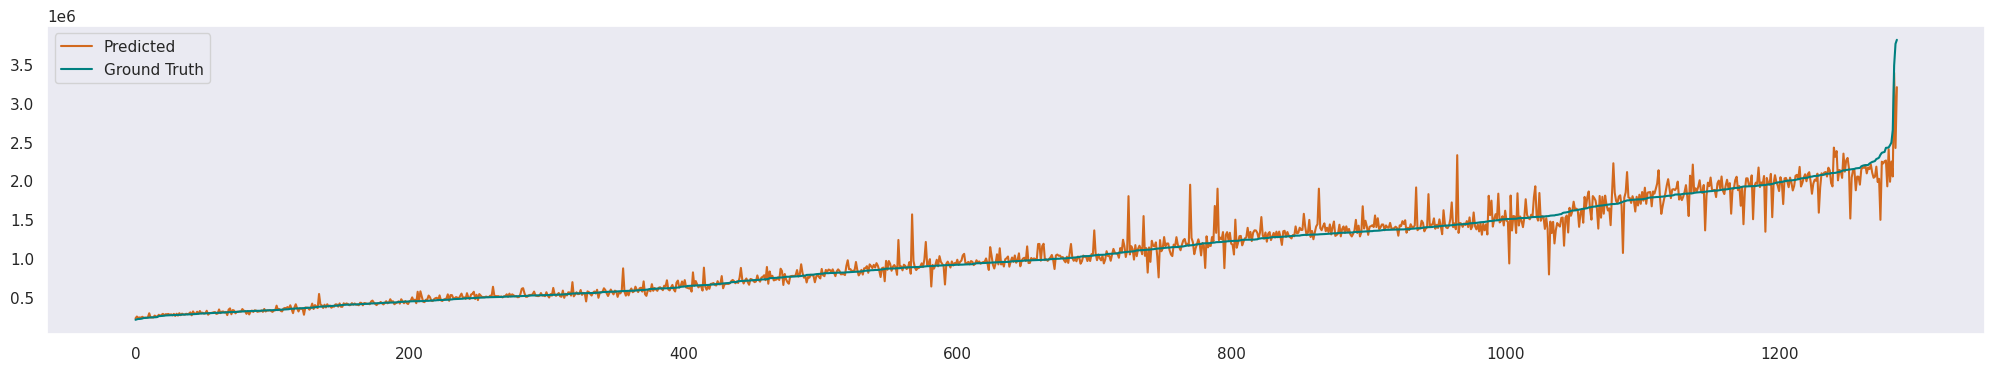

In [164]:
idx = np.argsort(y_test)
range = np.arange(0, len(y_test))

fig, ax = plt.subplots(figsize=(25, 4))
ax.grid(False)

ax.plot(range, y_pred[idx], c='chocolate')
ax.plot(range, y_test.iloc[idx], c='teal')

plt.legend(['Predicted', 'Ground Truth'])

plt.show()

## Conclusion

In [ ]:
print('pog')